> 1. **Necesity**: Build Model
> 2. **Google**: How do you search for the solution?
> 3. **Solution**: Find the `function()` that makes it happen

## Code Thinking

> Which function computes the Model?
> - `fit()`
>
> How could can you **import the function in Python**?

In [3]:
fit()

NameError: name 'fit' is not defined

In [4]:
model.fit()

NameError: name 'model' is not defined

`model = ?`

In [5]:
from sklearn.tree import DecisionTreeClassifier

In [6]:
model = DecisionTreeClassifier(max_depth=3)

In [7]:
model.fit()

TypeError: fit() missing 2 required positional arguments: 'X' and 'y'

### Separate Variables for the Model

> Regarding their role:
> 1. **Target Variable `y`**
>
> - [ ] What would you like **to predict**?
>
> Total number of accients? Or Alcohol?
>
> 2. **Explanatory Variable `X`**
>
> - [ ] Which variable will you use **to explain** the target?

In [8]:
df.drop(labels="survived")

KeyError: "['survived'] not found in axis"

In [39]:
df.drop(labels="survived", axis=1)

,pclass,age,sex_male
0,3,22.0,1
1,1,38.0,0
2,3,26.0,0
3,1,35.0,0
4,3,35.0,1
...,...,...,...
885,3,39.0,0
886,2,27.0,1
887,1,19.0,0
889,1,26.0,1


In [40]:
df.drop(columns='survived', labels='sex')

ValueError: Cannot specify both 'labels' and 'index'/'columns'

In [41]:
explanatory

,pclass,age,sex_male
0,3,22.0,1
1,1,38.0,0
2,3,26.0,0
3,1,35.0,0
4,3,35.0,1
...,...,...,...
885,3,39.0,0
886,2,27.0,1
887,1,19.0,0
889,1,26.0,1


In [18]:
import pandas as pd

In [19]:
df

,survived,pclass,sex,age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0
...,...,...,...,...
885,0,3,female,39.0
886,0,2,male,27.0
887,1,1,female,19.0
889,1,1,male,26.0


In [21]:
a = pd.DataFrame({'raza': ['blanco', 'blanco', 'negro', 'asiatico']})

In [22]:
pd.get_dummies(a)

,raza_asiatico,raza_blanco,raza_negro
0,0,1,0
1,0,1,0
2,0,0,1
3,1,0,0


In [23]:
a

,raza
0,blanco
1,blanco
2,negro
3,asiatico


In [24]:
pd.get_dummies(a, drop_first=True)

,raza_blanco,raza_negro
0,1,0
1,1,0
2,0,1
3,0,0


In [25]:
df.isna().sum()

survived    0
pclass      0
sex         0
age         0
dtype: int64

In [26]:
mask = df.isna().sum(axis=1) > 0

In [27]:
df[mask]

,survived,pclass,sex,age


In [28]:
df

,survived,pclass,sex,age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0
...,...,...,...,...
885,0,3,female,39.0
886,0,2,male,27.0
887,1,1,female,19.0
889,1,1,male,26.0


In [37]:
df = df.dropna()
df

,survived,pclass,age,sex_male
0,0,3,22.0,1
1,1,1,38.0,0
2,1,3,26.0,0
3,1,1,35.0,0
4,0,3,35.0,1
...,...,...,...,...
885,0,3,39.0,0
886,0,2,27.0,1
887,1,1,19.0,0
889,1,1,26.0,1


In [38]:
df = pd.get_dummies(df, drop_first=True)
df

,survived,pclass,age,sex_male
0,0,3,22.0,1
1,1,1,38.0,0
2,1,3,26.0,0
3,1,1,35.0,0
4,0,3,35.0,1
...,...,...,...,...
885,0,3,39.0,0
886,0,2,27.0,1
887,1,1,19.0,0
889,1,1,26.0,1


In [31]:
explanatory = df.drop(columns='survived')

In [32]:
explanatory

,pclass,age,sex_male
0,3,22.0,1
1,1,38.0,0
2,3,26.0,0
3,1,35.0,0
4,3,35.0,1
...,...,...,...
885,3,39.0,0
886,2,27.0,1
887,1,19.0,0
889,1,26.0,1


In [34]:
target = df.survived

In [35]:
target

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: survived, Length: 714, dtype: int64

### Finally `fit()` the Model

In [36]:
model.fit(X=explanatory, y=target)

DecisionTreeClassifier(max_depth=3)

## Calculate a Prediction with the Model

> - `model.predict_proba()`

In [97]:
juan = df.sample(random_state=42)

In [98]:
juan

,survived,pclass,age,sex_male
149,0,2,42.0,1


In [99]:
juan_pred = juan.drop(columns='survived')

In [100]:
juan_pred

,pclass,age,sex_male
149,2,42.0,1


In [101]:
model.predict(X=juan_pred)

array([0])

In [102]:
model.predict_proba(X=juan_pred)

array([[0.88181818, 0.11818182]])

## Model Visualization

> - `tree.plot_tree()`

In [103]:
tree?

Type:        module
String form: <module 'sklearn.tree' from '/Users/sota/miniforge3/lib/python3.9/site-packages/sklearn/tree/__init__.py'>
File:        ~/miniforge3/lib/python3.9/site-packages/sklearn/tree/__init__.py
Docstring:  
The :mod:`sklearn.tree` module includes decision tree-based models for
classification and regression.


In [43]:
from sklearn import tree

In [44]:
model

DecisionTreeClassifier(max_depth=3)

In [45]:
type(model)

sklearn.tree._classes.DecisionTreeClassifier

In [46]:
import matplotlib.pyplot as plt

In [47]:
explanatory

,pclass,age,sex_male
0,3,22.0,1
1,1,38.0,0
2,3,26.0,0
3,1,35.0,0
4,3,35.0,1
...,...,...,...
885,3,39.0,0
886,2,27.0,1
887,1,19.0,0
889,1,26.0,1


In [48]:
explanatory.columns

Index(['pclass', 'age', 'sex_male'], dtype='object')

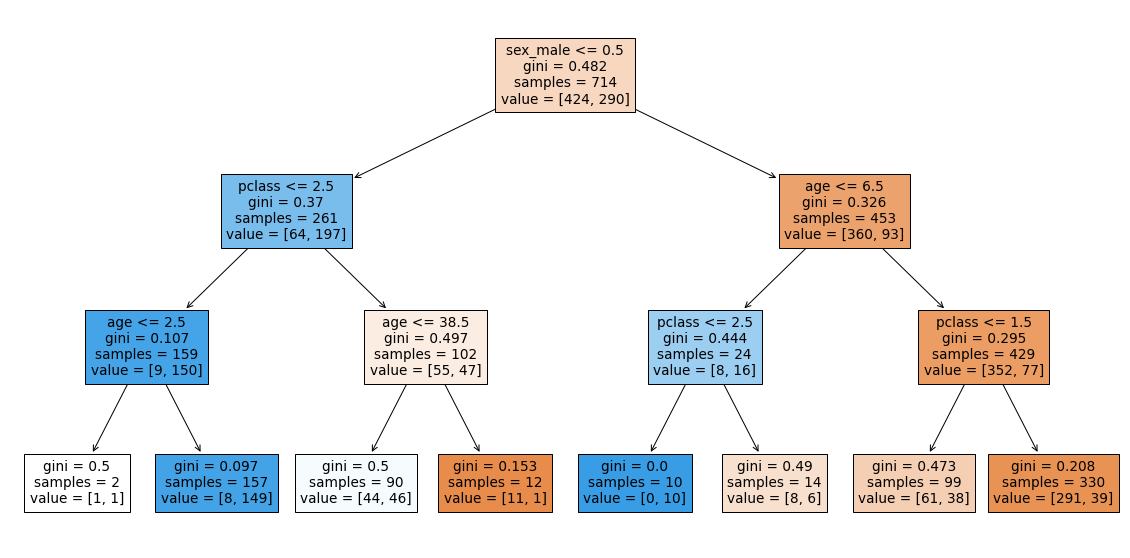

In [49]:
plt.figure(figsize=(20,10))
tree.plot_tree(decision_tree=model, feature_names=explanatory.columns, filled=True);

## Model Interpretation

> Why `sex` is the most important column? What has to do with **EDA** (Exploratory Data Analysis)?

In [113]:
330

330

In [114]:
39/330

0.11818181818181818

In [98]:
juan

,survived,pclass,age,sex_male
149,0,2,42.0,1


In [99]:
juan_pred = juan.drop(columns='survived')

In [100]:
juan_pred

,pclass,age,sex_male
149,2,42.0,1


In [101]:
model.predict(X=juan_pred)

array([0])

In [102]:
model.predict_proba(X=juan_pred)

array([[0.88181818, 0.11818182]])

# Prediction vs Reality

> How good is our model?

## Precision

> - `model.score()`

In [115]:
model.score(X=explanatory, y=target)

0.8081232492997199

In [116]:
dfsel = df[['survived']].copy()

In [119]:
pred = model.predict(X=explanatory)

In [120]:
dfsel['pred'] = pred

In [121]:
dfsel

,survived,pred
0,0,0
1,1,1
2,1,1
3,1,1
4,0,0
...,...,...
885,0,0
886,0,0
887,1,1
889,1,0


In [123]:
dfsel.pred == dfsel.survived

0       True
1       True
2       True
3       True
4       True
       ...  
885     True
886     True
887     True
889    False
890     True
Length: 714, dtype: bool

In [124]:
(dfsel.pred == dfsel.survived).sum()

577

In [125]:
(dfsel.pred == dfsel.survived).sum()/714

0.8081232492997199

In [126]:
(dfsel.pred == dfsel.survived).mean()

0.8081232492997199

## Confusion Matrix

> 1. **Sensitivity** (correct prediction on positive value, $y=1$)
> 2. **Specificity** (correct prediction on negative value $y=0$).
> - `plot_confusion_matrix()`

In [128]:
from sklearn.metrics import plot_confusion_matrix

- imagina que tenemos 100 personas
    - 90 no tienen covid
    - 10 tienen covid
- el modelo
    - predice todas las personas con no covid 100...
    
- metricas
    - precision: 90%
        - la gente que tiene covid: 0%  → sensibilidad
        - la gente que no tiene covid: 100% → especificidad

/Users/sota/miniforge3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


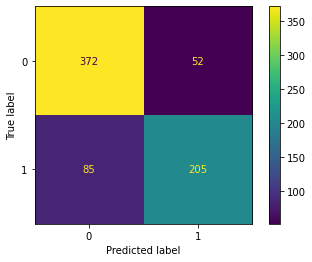

In [130]:
plot_confusion_matrix(estimator=model, X=explanatory, y_true=target);

In [133]:
sensibilidad = 205/(85 + 205)

In [134]:
sensibilidad

0.7068965517241379

In [135]:
especificidad = 372/(372 + 52)

In [136]:
especificidad

0.8773584905660378

In [137]:
from sklearn.metrics import classification_report

In [138]:
classification_report(y_true=dfsel.survived, y_pred=dfsel.pred)

'              precision    recall  f1-score   support\n\n           0       0.81      0.88      0.84       424\n           1       0.80      0.71      0.75       290\n\n    accuracy                           0.81       714\n   macro avg       0.81      0.79      0.80       714\nweighted avg       0.81      0.81      0.81       714\n'

In [139]:
a = classification_report(y_true=dfsel.survived, y_pred=dfsel.pred)

In [140]:
print(a)

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       424
           1       0.80      0.71      0.75       290

    accuracy                           0.81       714
   macro avg       0.81      0.79      0.80       714
weighted avg       0.81      0.81      0.81       714



## ROC Curve

> A way to summarise all the metrics (score, sensitivity & specificity)

In [141]:
from sklearn.metrics import plot_roc_curve

/Users/sota/miniforge3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


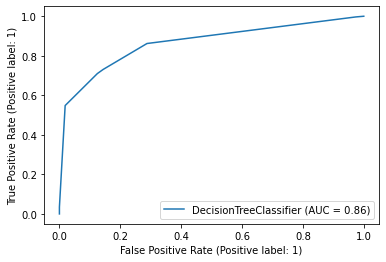

In [142]:
plot_roc_curve(estimator=model, X=explanatory, y=target)

In [143]:
from sklearn.linear_model import LogisticRegression

In [144]:
lr = LogisticRegression()

In [145]:
lr.fit(X=explanatory, y=target)

LogisticRegression()

/Users/sota/miniforge3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


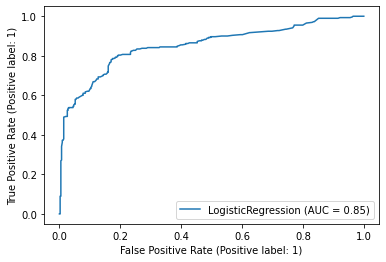

In [146]:
plot_roc_curve(estimator=lr, X=explanatory, y=target)

In [147]:
from sklearn.ensemble import RandomForestClassifier

In [148]:
lr = RandomForestClassifier()

In [149]:
lr.fit(X=explanatory, y=target)

RandomForestClassifier()

/Users/sota/miniforge3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


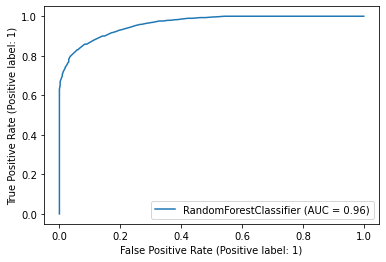

In [150]:
plot_roc_curve(estimator=lr, X=explanatory, y=target)